In [13]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt


from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score
from pandas.plotting         import register_matplotlib_converters 
register_matplotlib_converters()

from pingouin import pairwise_ttests

In [2]:
flight_traffic=pd.read_csv('flight_traffic.csv', sep=',',parse_dates=[[0,1,2]])

In [3]:
x = flight_traffic.groupby(['airline_id','year_month_day'])['cancelled'].sum()
x = pd.DataFrame(x)
x = x.reset_index()

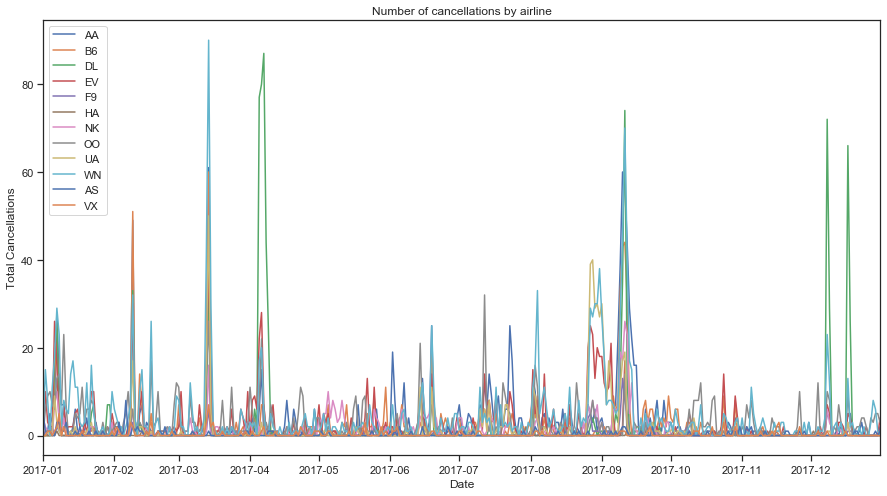

In [14]:
plt.figure(figsize=(15, 8))
for name in flight_traffic.airline_id.unique():
    plt.plot(x[x.airline_id == name]['year_month_day'],x[x.airline_id == name]['cancelled'],
            label = name)
    plt.ylabel("Total Cancellations")
    plt.xlabel("Date")
    plt.title("Number of cancellations by airline")
    plt.xlim(('2017-01-01','2017-12-31'))
    plt.legend()

(736330.0, 736694.0)

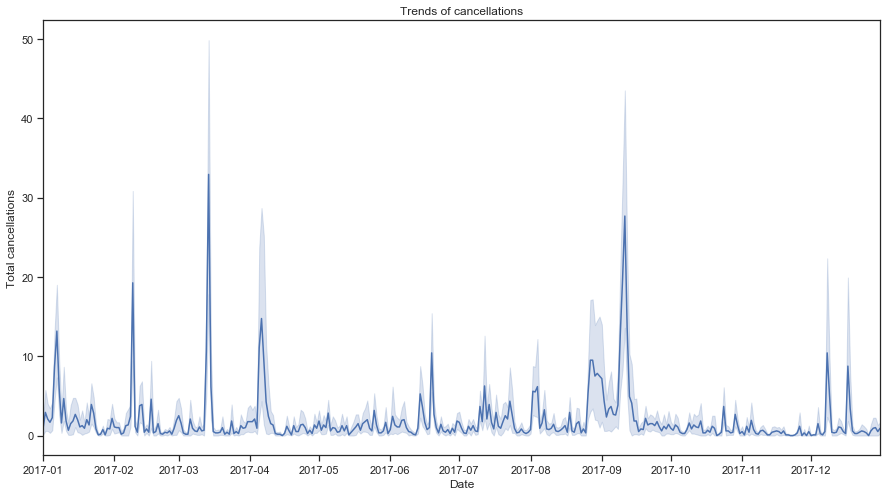

In [6]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='year_month_day', y='cancelled', data = x)
plt.ylabel("Total cancellations")
plt.xlabel("Date")
plt.title("Trends of cancellations")
plt.xlim(('2017-01-01','2017-12-31'))

In [7]:
pairwise_results = pairwise_ttests(dv='distance', between = ['airline_id'], padjust='bonf', data=flight_traffic)
pairwise_results

C:\Users\Maral\Anaconda3\lib\site-packages\pingouin\bayesian.py:151: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)
C:\Users\Maral\Anaconda3\lib\site-packages\pingouin\bayesian.py:151: RuntimeWarning: overflow encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,airline_id,AA,B6,False,True,-5.870,48401.26,two-sided,4.375405e-09,2.887767e-07,bonf,2.276e+05,-0.041
1,airline_id,AA,DL,False,True,49.297,181573.17,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.231
2,airline_id,AA,EV,False,True,221.581,123762.28,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.987
3,airline_id,AA,F9,False,True,-14.412,15611.81,two-sided,8.715549e-47,5.752262e-45,bonf,1.271e+43,-0.114
4,airline_id,AA,HA,False,True,35.030,8439.42,two-sided,4.061155e-251,2.680362e-249,bonf,6.244e+262,0.601
5,airline_id,AA,NK,False,True,5.001,27174.41,two-sided,5.735900e-07,3.785694e-05,bonf,2612.607,0.035
6,airline_id,AA,OO,False,True,223.027,139218.34,two-sided,0.000000e+00,0.000000e+00,bonf,inf,1.044
7,airline_id,AA,UA,False,True,-43.244,113939.28,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.236
8,airline_id,AA,WN,False,True,110.607,150442.96,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.509
9,airline_id,AA,AS,False,True,-38.508,24432.51,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.344


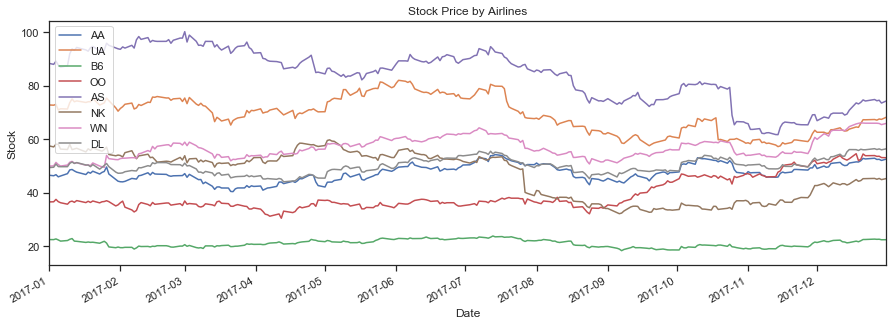

In [11]:
stock_price_date.plot(figsize=(15, 5))
plt.ylabel("Stock")
plt.xlabel("Date")
plt.title("Stock Price by Airlines")
plt.xlim(('2017-01-01','2017-12-31'))
plt.legend()